In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import pandas as pd

data = pd.read_excel("OSA_extreme_both.xlsx")

#data = pd.read_excel("OSA_extreme_both.xlsx")


Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [ ]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import absolute
import numpy as np
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# summarize shape
print(data.shape)
# summarize first few lines
print(data.head())
x_names = ['Gender','Weight','Height','Smoker','Snorer','BMI','Age','Cervical']
X=data[x_names]
y=data[['IAH']]

X=X.values
y=y.values

scalerX = StandardScaler()
scalerX.fit(X)
X = scalerX.transform(X)

alphas= np.arange(0, 1, 0.05).tolist()
means = []
stds = []
for alpha in alphas:

  # define model
  model = Lasso(alpha=alpha,max_iter=10000)
  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  model.fit(X,y)
  # force scores to be positive
  scores = absolute(scores)
  print('Alpha: %.1f Mean MSE: %.3f (%.3f)' % (alpha,mean(scores), std(scores)))
  means.append(mean(scores))
  stds.append(std(scores))
  

(412, 10)
   Gender   IAH  Weight  Height  ...  Smoker  Snorer        BMI      OSA
0       2  71.0    82.0     168  ...       1       3  29.053288   Severe
1       2   9.0    80.0     173  ...       4       3  26.729927  Healthy
2       2   2.0   109.0     190  ...       4       3  30.193906  Healthy
3       2  34.0    86.0     169  ...       4       3  30.110991   Severe
4       2  60.0   145.0     172  ...       4       3  49.012980   Severe

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.75802252062024, tolerance: 0.041199999999999994
  positive)


['Gender', 'Weight', 'Height', 'Smoker', 'Snorer', 'BMI', 'Age', 'Cervical']
[ 0.0424207   1.19253144 -0.6173971   0.01159353  0.11866915 -0.80366849
  0.15980513  0.30976355]
Alpha: 0.0 Mean MSE: 0.838 (0.110)
['Gender', 'Weight', 'Height', 'Smoker', 'Snorer', 'BMI', 'Age', 'Cervical']
[ 0.          0.05389138 -0.          0.          0.07411008  0.14863304
  0.11803663  0.31001312]
Alpha: 0.1 Mean MSE: 0.842 (0.105)
['Gender', 'Weight', 'Height', 'Smoker', 'Snorer', 'BMI', 'Age', 'Cervical']
[0.         0.01741792 0.         0.         0.02752004 0.14265236
 0.06690556 0.29327032]
Alpha: 0.1 Mean MSE: 0.855 (0.107)
['Gender', 'Weight', 'Height', 'Smoker', 'Snorer', 'BMI', 'Age', 'Cervical']
[ 0.          0.          0.         -0.          0.          0.1228893
  0.01862641  0.27032815]
Alpha: 0.2 Mean MSE: 0.872 (0.109)
['Gender', 'Weight', 'Height', 'Smoker', 'Snorer', 'BMI', 'Age', 'Cervical']
[ 0.          0.          0.         -0.          0.          0.0900932
  0.          0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.75802252062024, tolerance: 0.041199999999999994
  positive)


[array([ 0.0424207 ,  1.19253144, -0.6173971 ,  0.01159353,  0.11866915,
       -0.80366849,  0.15980513,  0.30976355]), array([ 0.        ,  0.05389138, -0.        ,  0.        ,  0.07411008,
        0.14863304,  0.11803663,  0.31001312]), array([0.        , 0.01741792, 0.        , 0.        , 0.02752004,
       0.14265236, 0.06690556, 0.29327032]), array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.1228893 ,  0.01862641,  0.27032815]), array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.0900932 ,  0.        ,  0.23970311]), array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.05756606,  0.        ,  0.20717944]), array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.02504193,  0.        ,  0.17465416]), array([ 0.       ,  0.       ,  0.       , -0.       ,  0.       ,
        0.       ,  0.       ,  0.1381088]), array([ 0.       ,  0.       ,  0.       , -0.       , 

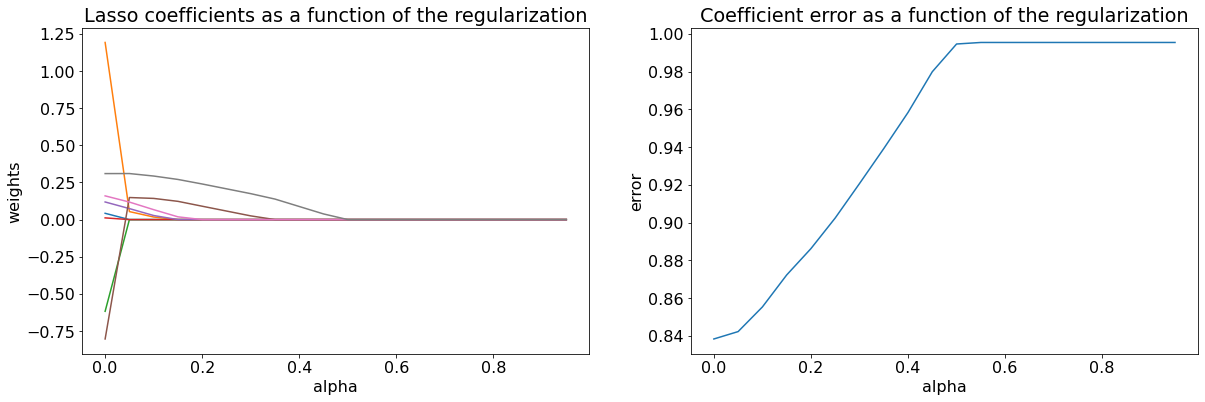

In [ ]:
from sklearn.metrics import mean_squared_error
coefs = []
errors = []
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    errors.append(abs(mean(scores)))
# Display results
print(coefs)
print(len(coefs[0]))
plt.figure(figsize=(20, 6))

plt.subplot(121)
for i in range(8):
  plt.plot(alphas, [item[i] for item in coefs])
#plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
#ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [ ]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.660
Config: {'alpha': 0.0}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.75802253551015, tolerance: 0.041199999999999994
  positive)


In [ ]:
results.best_estimator_.coef_

array([ 0.04241873,  1.19244356, -0.61735176,  0.01159431,  0.1186695 ,
       -0.80359297,  0.1598048 ,  0.30976662])